Los datos que se muestran a continuaci ́on se hallan en el archivo buffalo.txt y correspon-
den a la mediciones de cantidad de nieve ca ́ıda (en pulgadas) en Buffalo en los inviernos de

1910/1911 a 1972/1973.

In [2]:
datos <- scan('./buffalo.txt')

# $$\huge \mathcal 1.$$

1. Realice un histograma para estos datos utilizando los par ́ametros por default. Repetir
eligiendo como puntos de corte las siguientes secuencias: i) de 20 a 140 con paso 10 y ii)
de 20 a 140 con paso 5. Comparar los tres histogramas obtenidos. ¿Tiene alg ́un efecto el
refinamiento de los bins?

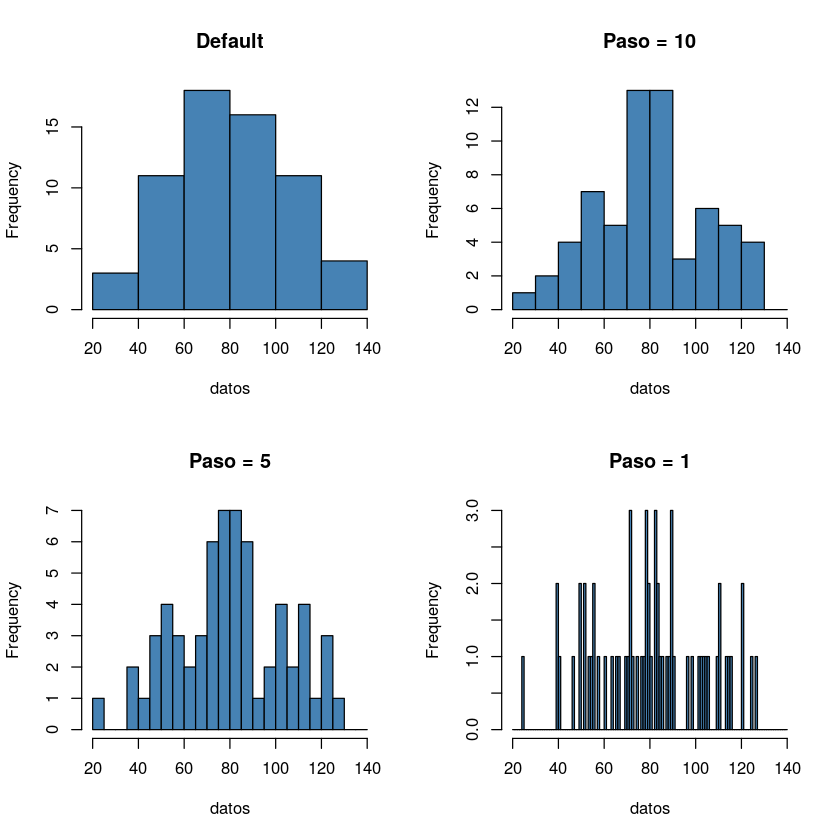

In [3]:
par(mfrow=c(2,2))
hist(datos, col='steelblue',main="Default")
hist(datos, col='steelblue', breaks=seq(20,140,10),main="Paso = 10")
hist(datos, col='steelblue', breaks=seq(20,140,5),main="Paso = 5")
hist(datos, col='steelblue', breaks=seq(20,140,1),main="Paso = 1")

# $$\huge \mathcal 2.$$

2. Realice un histograma para estas observaciones utilizando puntos de corte (10, 20, 30, 40,
50, 60, 70, 80, 90, 100, 110, 120, 130). Repita corriendo el punto de inicio de los bins en
2 unidades 2 veces consecutivas. Compare los tres histogramas obtenidos. ¿Tiene alg ́un
efecto la elecci ́on del punto inicial en este ejemplo?

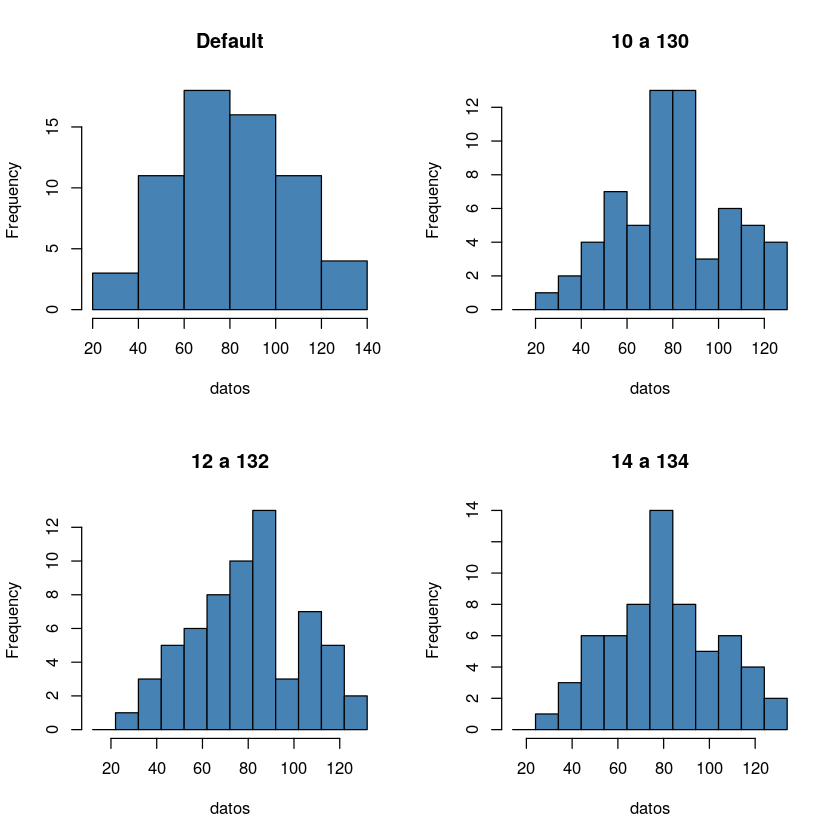

In [4]:
par(mfrow=c(2,2))
hist(datos, col='steelblue',main="Default")
hist(datos, col='steelblue', breaks=seq(10,130,10),main="10 a 130")
hist(datos, col='steelblue', breaks=seq(12,132,10),main="12 a 132")
hist(datos, col='steelblue', breaks=seq(14,134,10),main="14 a 134")

# $$\huge \mathcal 3.$$

3. Implemente una funci ́on densidad.est.parzen que tenga por argumento un conjunto
de datos x = (x1, . . . , xn), una ventana h y un punto x y devuelva fbh(x), el valor de la
estimaci ́on de la densidad f en el punto x, utilizando el n ́ucleo uniforme (tambi ́en llamado
rectangular).

## Estimador de Parzen

> $$\large \hat f_h(z) = \frac 1 {n h} \sum_{i=1}^n \mathbf K \left( \frac {z - X_i}{h} \right)$$

donde

> $ \large \mathbf K \left( t \right) = \frac 1 2 \mathbf 1\{ t \in [-1,1] \}$

Es el kernel uniforme $[-1,1]$ (aka núcleo rectangular)

In [5]:
densidad.est.parzen <- function(X, h, z){
    n <- length(X)
    t <- (z - X) / h
    Kt <- 0.5 * (t > -1 & t < 1)
    
    fhz <- 1 / (n*h) * sum(Kt) 
    
    return(fhz)
}

# $$\huge \mathcal 4.$$

4. Con la funci ́on densidad.est.parzen implementada, estime la densidad f en el inter-
valo (25,126.4) (m ́ınimo y m ́aximo de las observaciones) sobre una grilla de 200 puntos

equiespaciados para h = 10. Grafique el estimador fbh(x) obtenido.

In [6]:
Ngrilla <- 200
grilla.z <- seq(min(datos), max(datos), length=Ngrilla)

In [7]:
h.10  <- 10
h.05 <- 0.5
h.2  <- 2
f_hat.10  <- rep(NA, Ngrilla)
f_hat.05 <- rep(NA, Ngrilla)
f_hat.2  <- rep(NA, Ngrilla)
for(i in 1:Ngrilla){
    f_hat.10[i]   <- densidad.est.parzen(datos, h.10, grilla.z[i])
    f_hat.05[i]  <- densidad.est.parzen(datos, h.05, grilla.z[i])
    f_hat.2[i]   <- densidad.est.parzen(datos, h.2, grilla.z[i])
}

In [8]:
#?plotmath

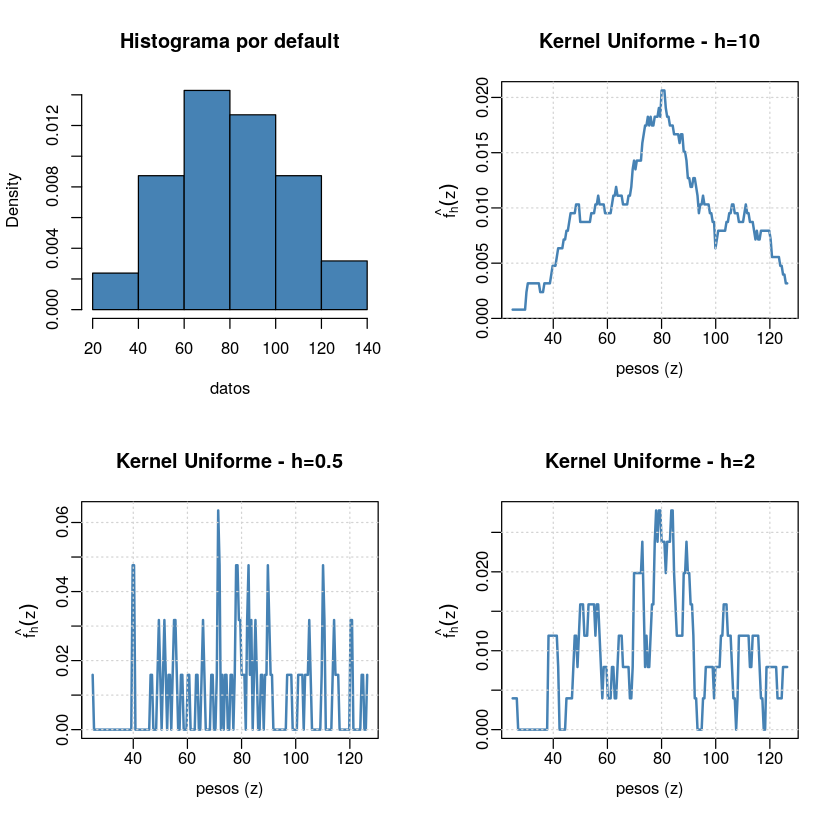

In [9]:
par(mfrow=c(2,2))
hist(datos, col="steelblue", prob=T, main="Histograma por default")
plot(grilla.z, f_hat.10, type='l', col='steelblue', lwd=2,main = "Kernel Uniforme - h=10", xlab='pesos (z)', ylab=expression(hat(f[h])(z)), mgp=c(2,0.5,0))
grid()
plot(grilla.z, f_hat.05, type='l', col='steelblue', lwd=2,main = "Kernel Uniforme - h=0.5", xlab='pesos (z)', ylab=expression(hat(f[h])(z)), mgp=c(2,0.5,0))
grid()
plot(grilla.z, f_hat.2, type='l', col='steelblue', lwd=2,main = "Kernel Uniforme - h=2", xlab='pesos (z)', ylab=expression(hat(f[h])(z)), mgp=c(2,0.5,0))
grid()

# $$\huge \mathcal 5.$$


5. Estime la funci ́on de densidad f de la variable pulgadas de nieve ca ́ıda en invierno a
partir de los datos de Buffalo a trav ́es de la funci ́on densidad.est.parzen implementada
en el item anterior usando h = 10. Realice un histograma para los datos de Buffalo y
superponga la densidad estimada en los datos mediante la funci ́on densidad.est.parzen
utilizando h = 10, 20 y 30. Observe como var ́ıa la rugosidad de los estimadores de f
obtenidos.

In [10]:
h.10 <- 10
h.20 <- 20
h.30 <- 30
f_hat.10 <- rep(NA, Ngrilla)
f_hat.20 <- rep(NA, Ngrilla)
f_hat.30 <- rep(NA, Ngrilla)
for(i in 1:Ngrilla){
    f_hat.10[i]  <- densidad.est.parzen(datos, h.10, grilla.z[i])
    f_hat.20[i]  <- densidad.est.parzen(datos, h.20, grilla.z[i])
    f_hat.30[i]  <- densidad.est.parzen(datos, h.30, grilla.z[i])
}

In [11]:
#?plotmath

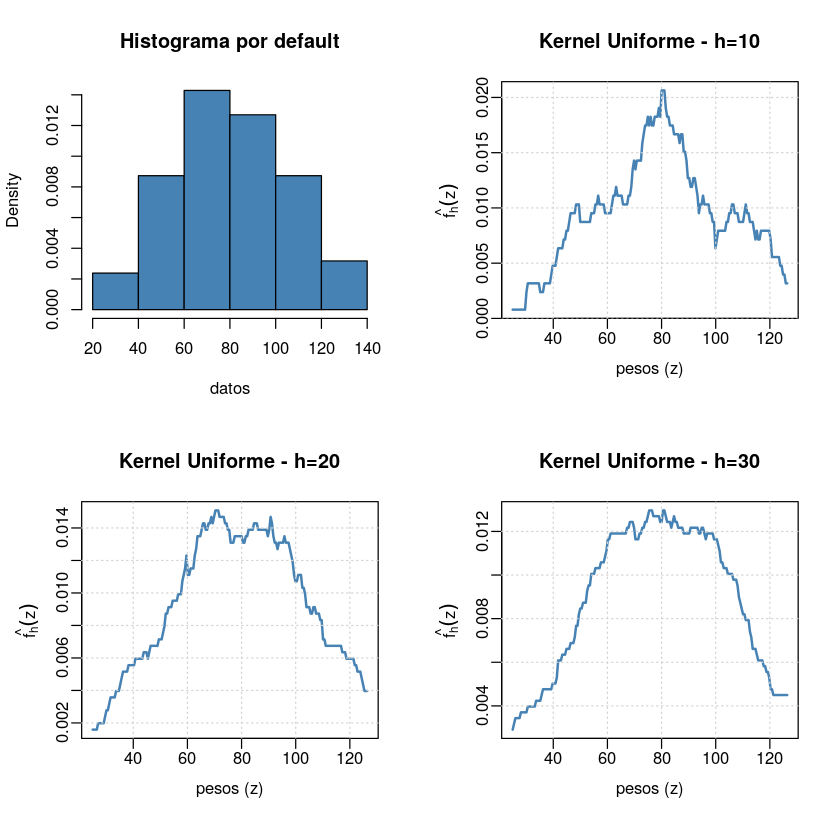

In [12]:
par(mfrow=c(2,2))
hist(datos, col="steelblue", prob=T, main="Histograma por default")
plot(grilla.z, f_hat.10, type='l', col='steelblue', lwd=2,main = "Kernel Uniforme - h=10", xlab='pesos (z)', ylab=expression(hat(f[h])(z)), mgp=c(2,0.5,0))
grid()
plot(grilla.z, f_hat.20, type='l', col='steelblue', lwd=2,main = "Kernel Uniforme - h=20", xlab='pesos (z)', ylab=expression(hat(f[h])(z)), mgp=c(2,0.5,0))
grid()
plot(grilla.z, f_hat.30, type='l', col='steelblue', lwd=2,main = "Kernel Uniforme - h=30", xlab='pesos (z)', ylab=expression(hat(f[h])(z)), mgp=c(2,0.5,0))
grid()

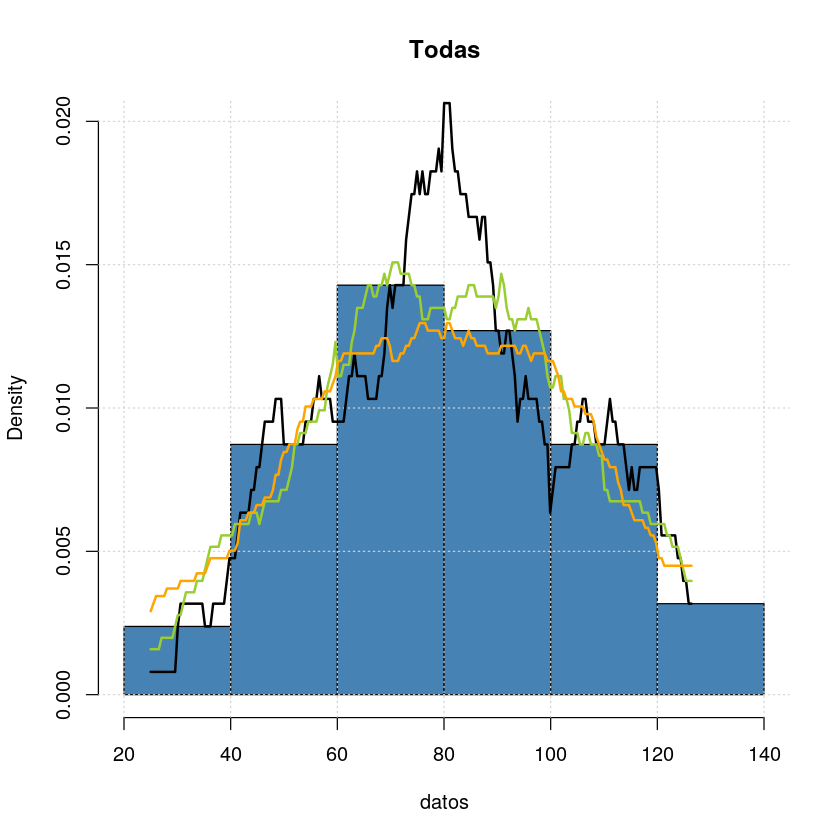

In [13]:
hist(datos, col="steelblue", prob=T, main="Todas", ylim=c(0, 0.02))
grid()
lines(grilla.z, f_hat.10, type='l', col='black', lwd=2, 
      main = "Kernel Uniforme - h=10", xlab='pesos (z)', ylab=expression(hat(f[h])(z)), mgp=c(2,0.5,0))
lines(grilla.z, f_hat.20, type='l', col='yellowgreen', lwd=2,main = "Kernel Uniforme - h=20", xlab='pesos (z)', ylab=expression(hat(f[h])(z)), mgp=c(2,0.5,0))
lines(grilla.z, f_hat.30, type='l', col='orange', lwd=2,main = "Kernel Uniforme - h=30", xlab='pesos (z)', ylab=expression(hat(f[h])(z)), mgp=c(2,0.5,0))


In [14]:
density(datos, kernel='rectangular', window=10)


Call:
	density.default(x = datos, kernel = "rectangular", window = 10)

Data: datos (63 obs.);	Bandwidth 'bw' = 9.321

       x                 y            
 Min.   : -2.964   Min.   :0.0000000  
 1st Qu.: 36.368   1st Qu.:0.0004916  
 Median : 75.700   Median :0.0062270  
 Mean   : 75.700   Mean   :0.0063298  
 3rd Qu.:115.032   3rd Qu.:0.0106396  
 Max.   :154.364   Max.   :0.0157302  

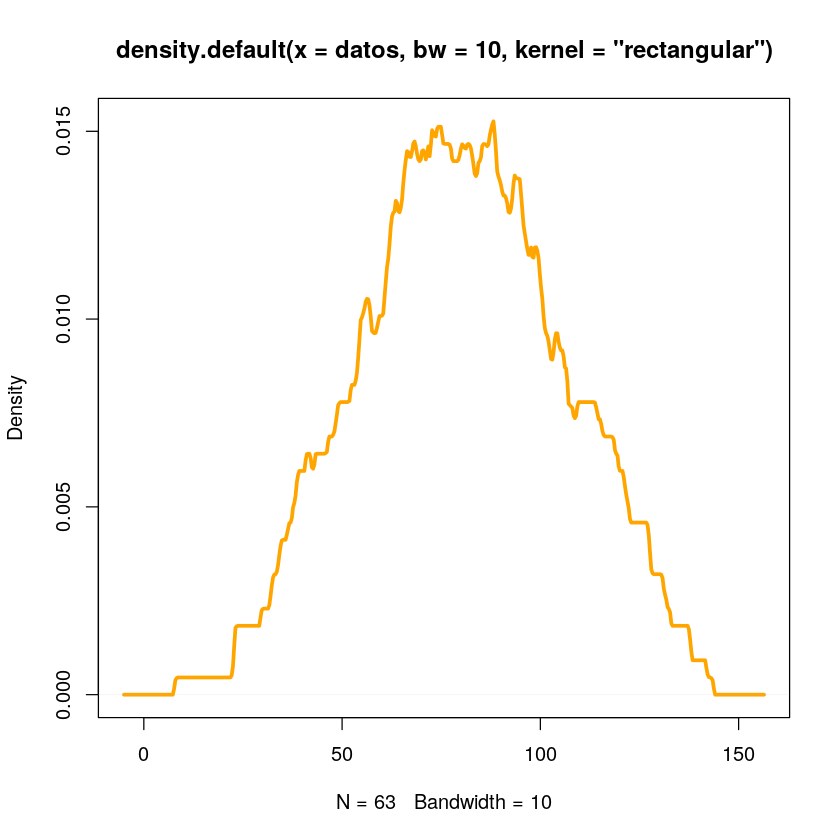

In [15]:
plot(density(datos, kernel='rectangular', bw=10), lwd=3, col="orange")

# $$\huge \mathcal 6.$$


6. La funci ́on de R density computa un estimador de la densidad a partir de un conjunto de datos x = (x1, . . . , xn) y la eval ́ua en un conjunto de puntos intermedios.

  Mediante la funci ́on de R density estime la funci ́on de densidad f de la variable pulgadas de nieve ca ́ıda en invierno a partir de los datos de Buffalo y utilizando el **nucleo normal, el rectangular y el de Epanechnikov** con ventana h = 5.

  Realice un gr ́afico en el que superpone las tres estimaciones de f y compare los resultados.

> Agrego el **triangular** porque está en las diapos y me parece interesante, ya que da pesos que decaen linealmente con la distancia al centro.
>
> Implemento nucleos porque sí.

$$\begin{align}
\large \textbf{Rectangular} : K(t) & \large \ = \frac 1 2 \mathbb 1_{[-1,1]}(t)\\\\
\large\textbf{Triangular} : K(t) & \large \ = (1-|t|) \mathbb 1_{[-1,1]}(t) \\\\
\large\textbf{Gaussiano} : K(t) & \large \ = \frac 1 {\sqrt{2\pi}} e^{-\frac 1 2 t^2}  \\\\
\large\textbf{Epanechnikov} : K(t) & \large \ = \frac 3 4 (1-t^2) 1_{[-1,1]}(t) \\\\
\end{align}$$

In [164]:
ker.uniforme <- function(t){
    return (0.5 * (t > -1 & t < 1))
}

In [165]:
# ker.uniforme <- function(t){
#     return (1 * (t > -1/2 & t < 1/2))
# }

In [166]:
ker.triangular <- function(t){
    return ((1-abs(t)) * (t > -1 & t < 1))
}

In [167]:
ker.gaussiano <- function(t){
    return (dnorm(t, mean=0, sd=1))
}

In [168]:
ker.epanechnikov <- function(t){
    return (3/4 * (1-t^2) * (t > -1 & t < 1))
}

In [169]:
Ngrilla  <- 200
grilla.z <- seq(-1.5, 1.5, length=Ngrilla)

In [170]:
f.uni <- rep(NA, Ngrilla)
f.tri <- rep(NA, Ngrilla)
f.gau <- rep(NA, Ngrilla)
f.epa <- rep(NA, Ngrilla)
for(i in 1:Ngrilla){
    t <- grilla.z[i]
    f.uni[i]  <- ker.uniforme(t)
    f.tri[i]  <- ker.triangular(t)
    f.gau[i]  <- ker.gaussiano(t)
    f.epa[i]  <- ker.epanechnikov(t)
}

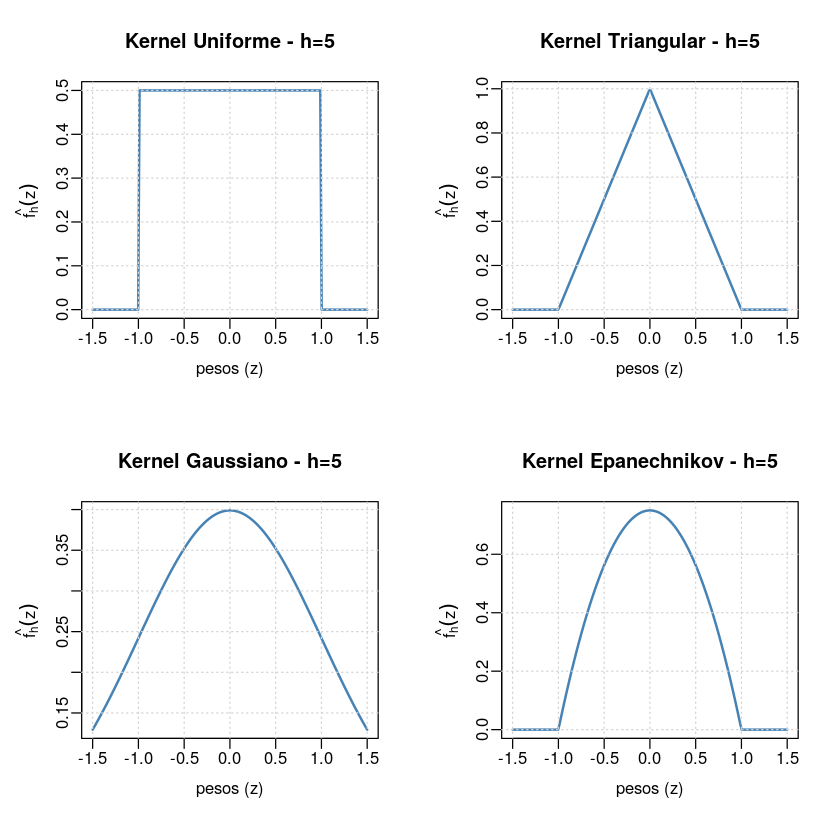

In [171]:
par(mfrow=c(2,2))
plot(grilla.z, f.uni, type='l', col='steelblue', lwd=2,main = "Kernel Uniforme - h=5", xlab='pesos (z)', ylab=expression(hat(f[h])(z)), mgp=c(2,0.5,0))
grid()
plot(grilla.z, f.tri, type='l', col='steelblue', lwd=2,main = "Kernel Triangular - h=5", xlab='pesos (z)', ylab=expression(hat(f[h])(z)), mgp=c(2,0.5,0))
grid()
plot(grilla.z, f.gau, type='l', col='steelblue', lwd=2,main = "Kernel Gaussiano - h=5", xlab='pesos (z)', ylab=expression(hat(f[h])(z)), mgp=c(2,0.5,0))
grid()
plot(grilla.z, f.epa, type='l', col='steelblue', lwd=2,main = "Kernel Epanechnikov - h=5", xlab='pesos (z)', ylab=expression(hat(f[h])(z)), mgp=c(2,0.5,0))
grid()

In [176]:
densidad.est.parzen.ker <- function(X, h, z, K){
    n <- length(X)
    t <- (z - X) / h
    Kt <- K(t)
    
    fhz <- 1 / (n*h) * sum(Kt) 
    
    return(fhz)
}

In [177]:
Ngrilla <- 200
grilla.z <- seq(min(datos), max(datos), length=Ngrilla)

In [178]:
h.5 <- 5
f_hat.uni <- rep(NA, Ngrilla)
f_hat.tri <- rep(NA, Ngrilla)
f_hat.gau <- rep(NA, Ngrilla)
f_hat.epa <- rep(NA, Ngrilla)
for(i in 1:Ngrilla){
    t <- grilla.z[i]
    f_hat.uni[i]  <- densidad.est.parzen.ker(datos, h.5, t, ker.uniforme)
    f_hat.tri[i]  <- densidad.est.parzen.ker(datos, h.5, t, ker.triangular)
    f_hat.gau[i]  <- densidad.est.parzen.ker(datos, h.5, t, ker.gaussiano)
    f_hat.epa[i]  <- densidad.est.parzen.ker(datos, h.5, t, ker.epanechnikov)
}

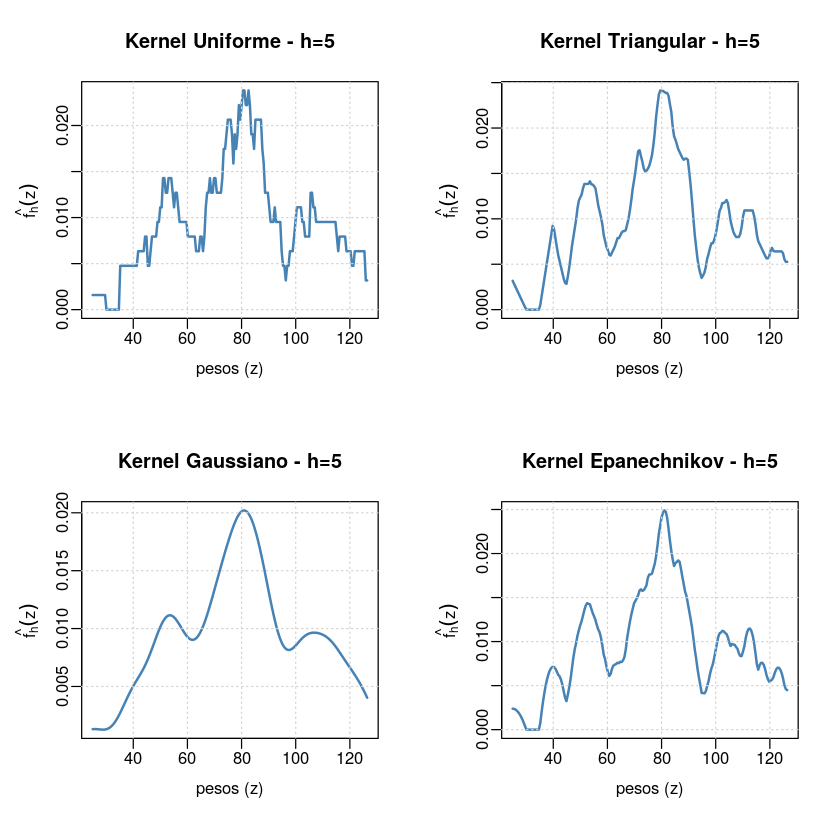

In [179]:
par(mfrow=c(2,2))
plot(grilla.z, f_hat.uni, type='l', col='steelblue', lwd=2,main = "Kernel Uniforme - h=5", xlab='pesos (z)', ylab=expression(hat(f[h])(z)), mgp=c(2,0.5,0))
grid()
plot(grilla.z, f_hat.tri, type='l', col='steelblue', lwd=2,main = "Kernel Triangular - h=5", xlab='pesos (z)', ylab=expression(hat(f[h])(z)), mgp=c(2,0.5,0))
grid()
plot(grilla.z, f_hat.gau, type='l', col='steelblue', lwd=2,main = "Kernel Gaussiano - h=5", xlab='pesos (z)', ylab=expression(hat(f[h])(z)), mgp=c(2,0.5,0))
grid()
plot(grilla.z, f_hat.epa, type='l', col='steelblue', lwd=2,main = "Kernel Epanechnikov - h=5", xlab='pesos (z)', ylab=expression(hat(f[h])(z)), mgp=c(2,0.5,0))
grid()

In [28]:
h.10 <- 10
f_hat.uni <- rep(NA, Ngrilla)
f_hat.tri <- rep(NA, Ngrilla)
f_hat.gau <- rep(NA, Ngrilla)
f_hat.epa <- rep(NA, Ngrilla)
for(i in 1:Ngrilla){
    t <- grilla.z[i]
    f_hat.uni[i]  <- densidad.est.parzen.ker(datos, h.10, t, ker.uniforme)
    f_hat.tri[i]  <- densidad.est.parzen.ker(datos, h.10, t, ker.triangular)
    f_hat.gau[i]  <- densidad.est.parzen.ker(datos, h.10, t, ker.gaussiano)
    f_hat.epa[i]  <- densidad.est.parzen.ker(datos, h.10, t, ker.epanechnikov)
}

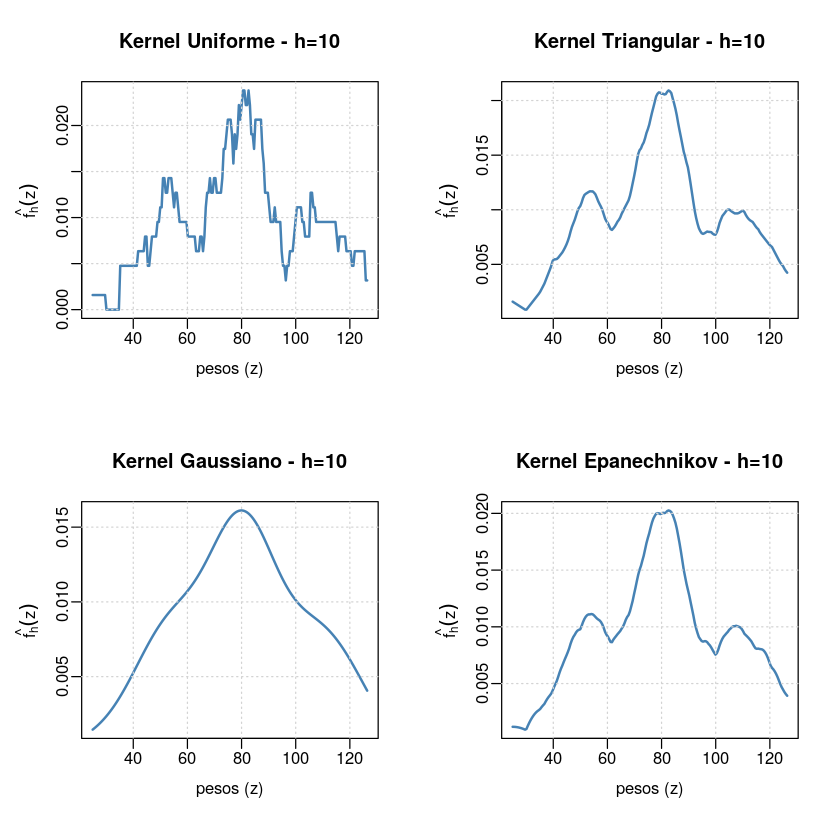

In [29]:
par(mfrow=c(2,2))
plot(grilla.z, f_hat.uni, type='l', col='steelblue', lwd=2,main = "Kernel Uniforme - h=10", xlab='pesos (z)', ylab=expression(hat(f[h])(z)), mgp=c(2,0.5,0))
grid()
plot(grilla.z, f_hat.tri, type='l', col='steelblue', lwd=2,main = "Kernel Triangular - h=10", xlab='pesos (z)', ylab=expression(hat(f[h])(z)), mgp=c(2,0.5,0))
grid()
plot(grilla.z, f_hat.gau, type='l', col='steelblue', lwd=2,main = "Kernel Gaussiano - h=10", xlab='pesos (z)', ylab=expression(hat(f[h])(z)), mgp=c(2,0.5,0))
grid()
plot(grilla.z, f_hat.epa, type='l', col='steelblue', lwd=2,main = "Kernel Epanechnikov - h=10", xlab='pesos (z)', ylab=expression(hat(f[h])(z)), mgp=c(2,0.5,0))
grid()

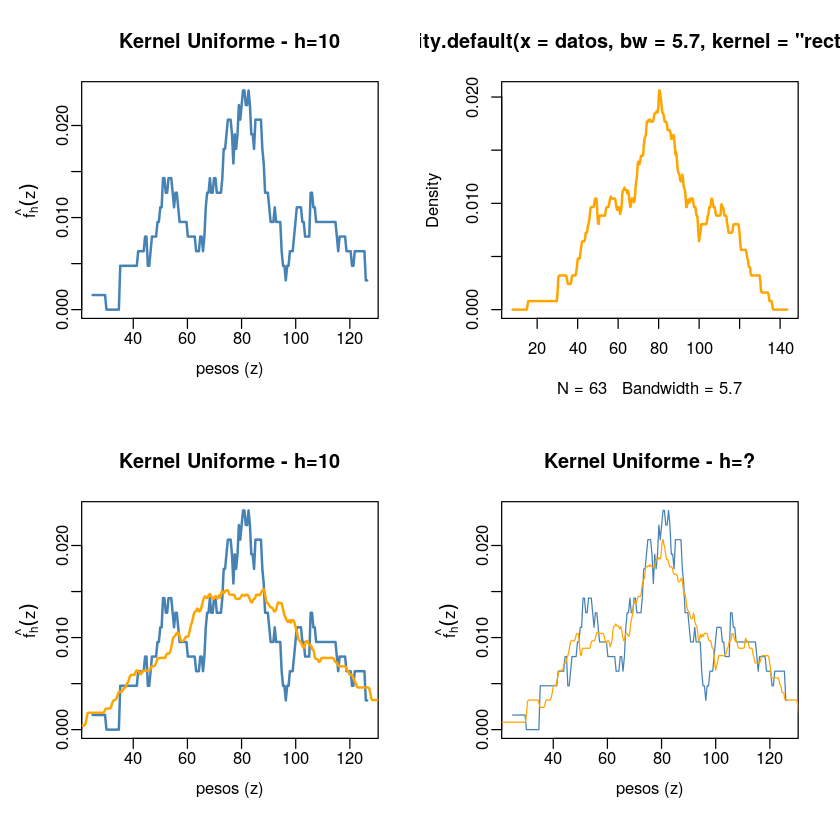

In [30]:
par(mfrow=c(2,2))
plot(grilla.z, f_hat.uni, type='l', col='steelblue', lwd=2, main = "Kernel Uniforme - h=10", xlab='pesos (z)', ylab=expression(hat(f[h])(z)), mgp=c(2,0.5,0))
plot(density(datos, kernel='rectangular', bw=5.7), lwd=2, col='orange')

plot(grilla.z, f_hat.uni, type='l', col='steelblue', lwd=2, main = "Kernel Uniforme - h=10", xlab='pesos (z)', ylab=expression(hat(f[h])(z)), mgp=c(2,0.5,0))
lines(density(datos, kernel='rectangular', bw=10), lwd=2, col='orange')

plot(grilla.z, f_hat.uni, type='l', col='steelblue', lwd=1, main = "Kernel Uniforme - h=?", xlab='pesos (z)', ylab=expression(hat(f[h])(z)), mgp=c(2,0.5,0))
lines(density(datos, kernel='rectangular', bw=5.7), lwd=1, col='orange')

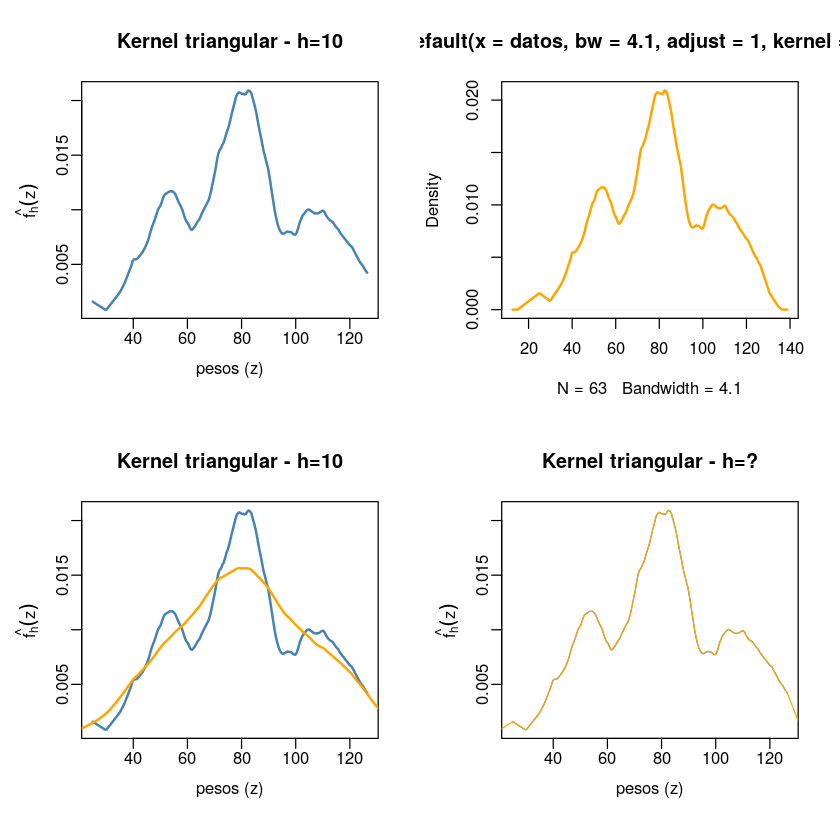

In [31]:
par(mfrow=c(2,2))
plot(grilla.z, f_hat.tri, type='l', col='steelblue', lwd=2, main = "Kernel triangular - h=10", xlab='pesos (z)', ylab=expression(hat(f[h])(z)), mgp=c(2,0.5,0))

plot(density(datos, kernel='triangular', bw=4.1, adjust = 1), lwd=2, col='orange')

plot(grilla.z, f_hat.tri, type='l', col='steelblue', lwd=2, main = "Kernel triangular - h=10", xlab='pesos (z)', ylab=expression(hat(f[h])(z)), mgp=c(2,0.5,0))
lines(density(datos, kernel='triangular', bw=10, adjust = 1), lwd=2, col='orange')

plot(grilla.z, f_hat.tri, type='l', col='steelblue', lwd=1, main = "Kernel triangular - h=?", xlab='pesos (z)', ylab=expression(hat(f[h])(z)), mgp=c(2,0.5,0))
lines(density(datos, kernel='triangular', bw=4.1, adjust = 1), lwd=1, col='orange')

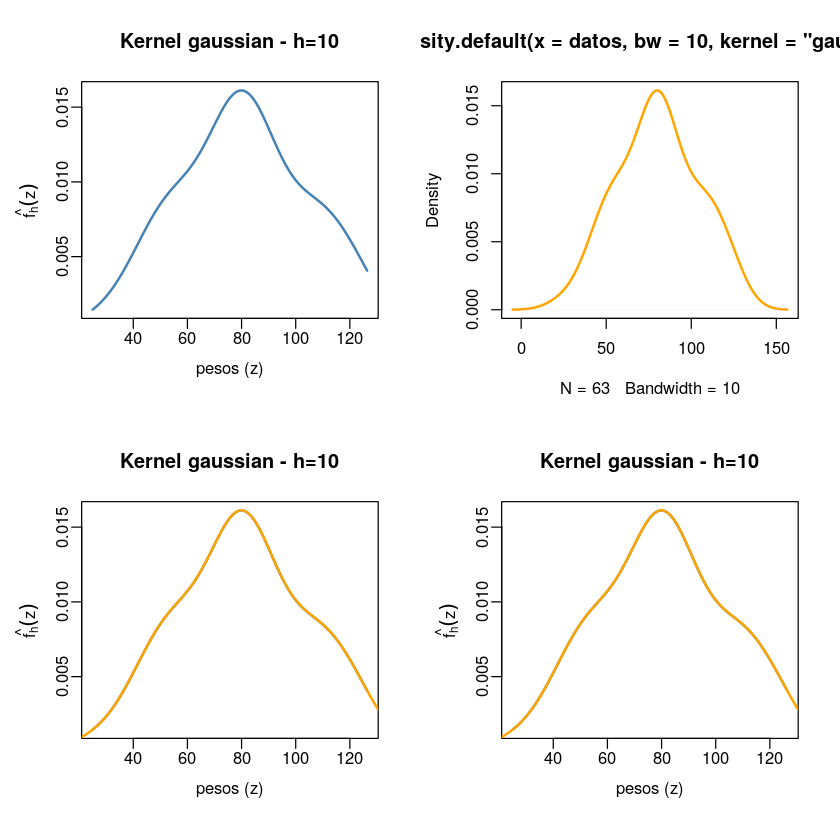

In [32]:
par(mfrow=c(2,2))
plot(grilla.z, f_hat.gau, type='l', col='steelblue', lwd=2, main = "Kernel gaussian - h=10", xlab='pesos (z)', ylab=expression(hat(f[h])(z)), mgp=c(2,0.5,0))
plot(density(datos, kernel='gaussian', bw=10), lwd=2,col='orange')

plot(grilla.z, f_hat.gau, type='l', col='steelblue', lwd=2, main = "Kernel gaussian - h=10", xlab='pesos (z)', ylab=expression(hat(f[h])(z)), mgp=c(2,0.5,0))
lines(density(datos, kernel='gaussian', bw=10), lwd=2,col='orange')

plot(grilla.z, f_hat.gau, type='l', col='steelblue', lwd=2, main = "Kernel gaussian - h=10", xlab='pesos (z)', ylab=expression(hat(f[h])(z)), mgp=c(2,0.5,0))
lines(density(datos, kernel='gaussian', bw=10), lwd=2,col='orange')

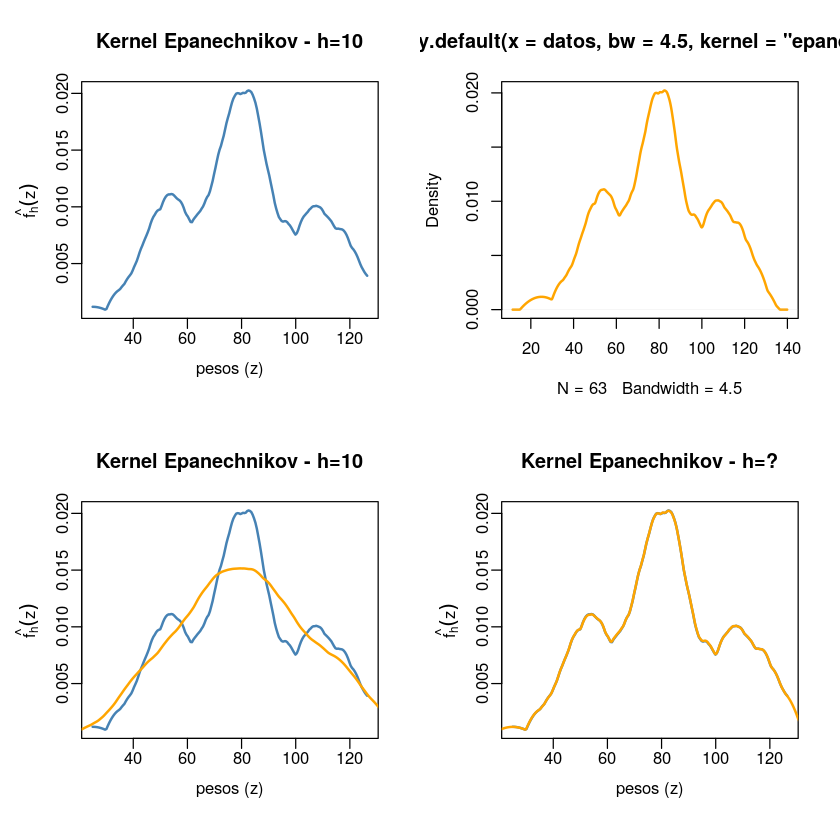

In [33]:
par(mfrow=c(2,2))
plot(grilla.z, f_hat.epa, type='l', col='steelblue', lwd=2, main = "Kernel Epanechnikov - h=10", xlab='pesos (z)', ylab=expression(hat(f[h])(z)), mgp=c(2,0.5,0))
plot(density(datos, kernel='epanechnikov', bw=4.5), lwd=2,col='orange')

plot(grilla.z, f_hat.epa, type='l', col='steelblue', lwd=2, main = "Kernel Epanechnikov - h=10", xlab='pesos (z)', ylab=expression(hat(f[h])(z)), mgp=c(2,0.5,0))
lines(density(datos, kernel='epanechnikov', bw=10), lwd=2,col='orange')

plot(grilla.z, f_hat.epa, type='l', col='steelblue', lwd=2, main = "Kernel Epanechnikov - h=?", xlab='pesos (z)', ylab=expression(hat(f[h])(z)), mgp=c(2,0.5,0))
lines(density(datos, kernel='epanechnikov', bw=4.5), lwd=2,col='orange')

# $$\huge \mathcal 7.$$

7. Para los datos de Buffalo halle la ventana óptima $h_S$ por la regla de Silverman para el núcleo normal, calcule la estimación de f basada en el núcleo normal con dicha ventana y grafique la estimación de la densidad obtenida.

El $\normalsize ECMI[\hat f_h]$ se minimiza en 

$$\Large h = \left( \frac {\left|\left|K\right|\right|_2^2}{C_1^2(K)\ \left|\left|f''\right|\right|_2^2 \ n} \right)^\frac 1 5$$

Silverman propone reemplazar la segunda derivada por su valor couando f es Normal:

$$\Large \left|\left|f'' \right|\right|_2^2 = \sigma^{-5} \frac {3}{8 \sqrt{\pi}} \approx 0.212 \ \sigma^{-5}$$

y a $\normalsize \sigma$ por un estimador $\normalsize \widehat\sigma$

$\huge \therefore$

$$\Large h_{Sil} = \left(\frac{4\ \widehat\sigma^5}{3 n}\right)^\frac 1 5 \approx 1.06 \  \widehat\sigma \ n^{-\frac 1 5}$$

La ventana ótima (usando S e IQR como estimación de sigma)

$$\Large h_{Sil} = 1.06 \min\left( S, \frac{IQR}{1.349}\right) \ n^{-\frac 1 5} $$

In [63]:
h.Sil <- function(X){
    n <- length(X)
    S <- sd(X)
    IQR <- IQR(X)
    a <- (4/3)^(1/5)
    return ( a * min(S, IQR/1.349) * n^(-1/5) )
}

In [64]:
h.Sil(datos)

[1] 10.97061

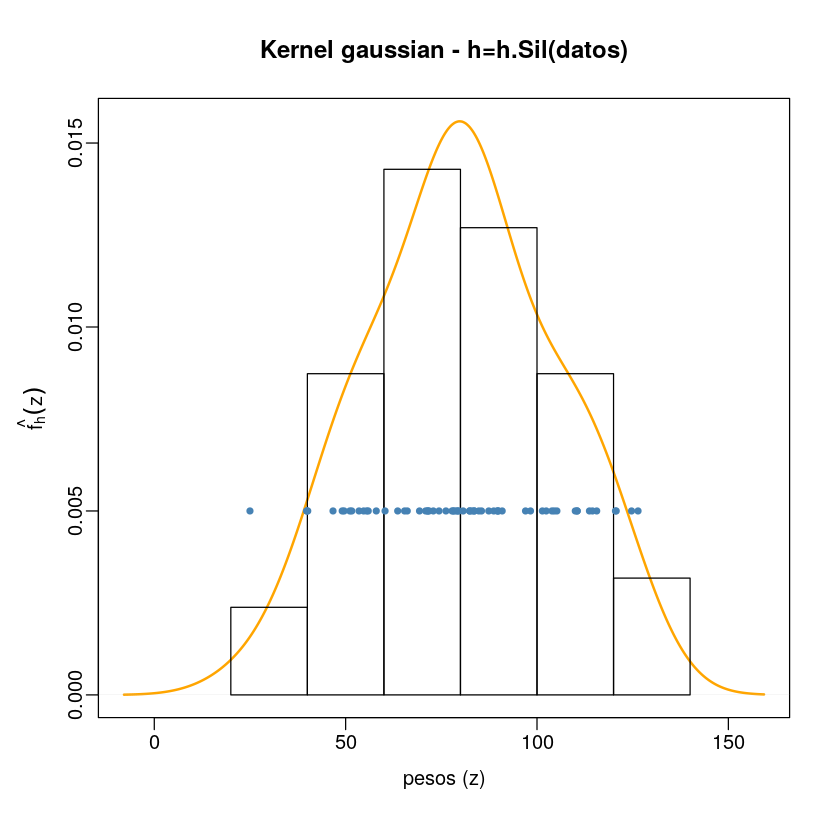

In [93]:
plot(density(datos, kernel='gaussian', bw=h.Sil(datos)), lwd=2,col='orange',
     main = "Kernel gaussian - h=h.Sil(datos)", xlab='pesos (z)', ylab=expression(hat(f[h])(z)), mgp=c(2,0.5,0))
hist(datos, add=T, prob=T)
points(datos, rep(0.005,63), col='steelblue', pch=20)


$$\huge \mathcal 8.$$

8. Se puede realizar la estimación de la densidad f a partir de un conjunto de datos a través
de la función density en un punto deseado x (f.hat.x) de la siguiente forma:

f.hat.x<- density(datos, from=x, to=x, n=1)

También mediante la función approxfun de R se puede aproximar la densidad estimada
por la función de R density en el punto deseado x a partir de un conjunto de datos de
la siguiente manera:

df <- approxfun(density(datos))

f.hat.x<-df(x)

Calcule la estimación de la densidad usando density a partir de los datos de Buffalo
usando la ventana de Silverman y con esta estimación obtenga estimaciones de la densidad
en los valores observados de nieve caı́da en Buffalo. 

Grafique la densidad estimada y
superponga en el mismo plot los puntos correspondientes a las observaciones y el valor
estimado de la densidad correspondiente en rojo.

In [109]:
x<- 50
f.hat.x <- density(datos, from=x, to=x, n=1)
f.hat.x

[1] 0.008648017

In [102]:
df <- approxfun(density(datos))
f.hat.x <- df(x)
f.hat.x

[1] 0.008648079

In [146]:
n <- length(datos)
f.hat <- rep(NA, n)
for(i in 1:n){
    x <- datos[i]
    f.hat[i] <- density(datos, from=x, to=x, n=1)$y
}

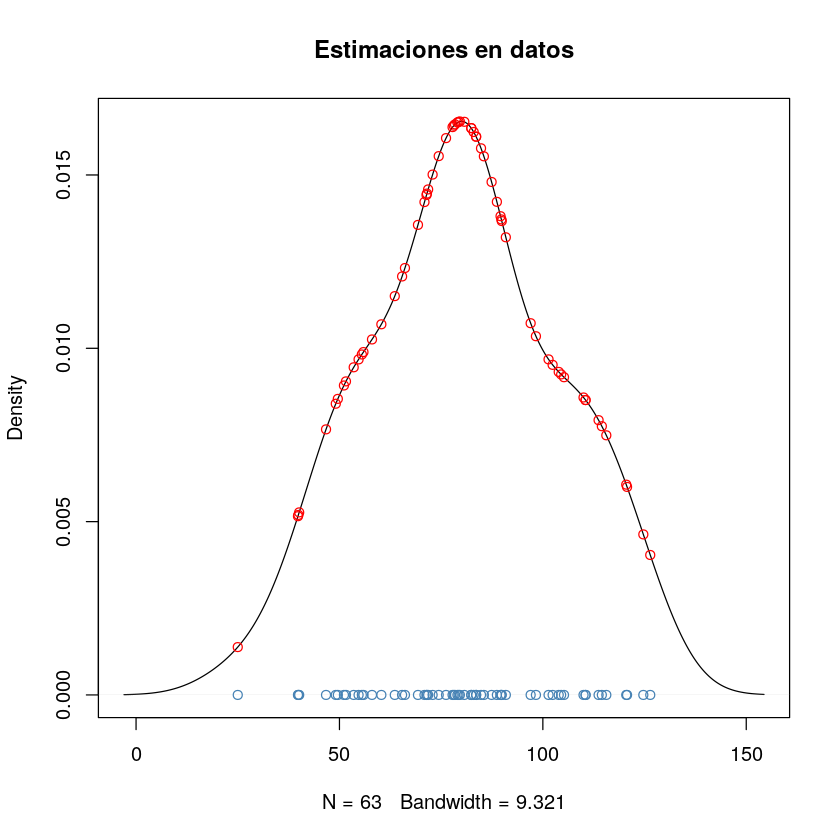

In [149]:
plot(density(datos), main="Estimaciones en datos")
points(datos, f.hat, col='red')
points(datos, rep(0, n),col='steelblue')

Observar qué pasa con h muy pequeña

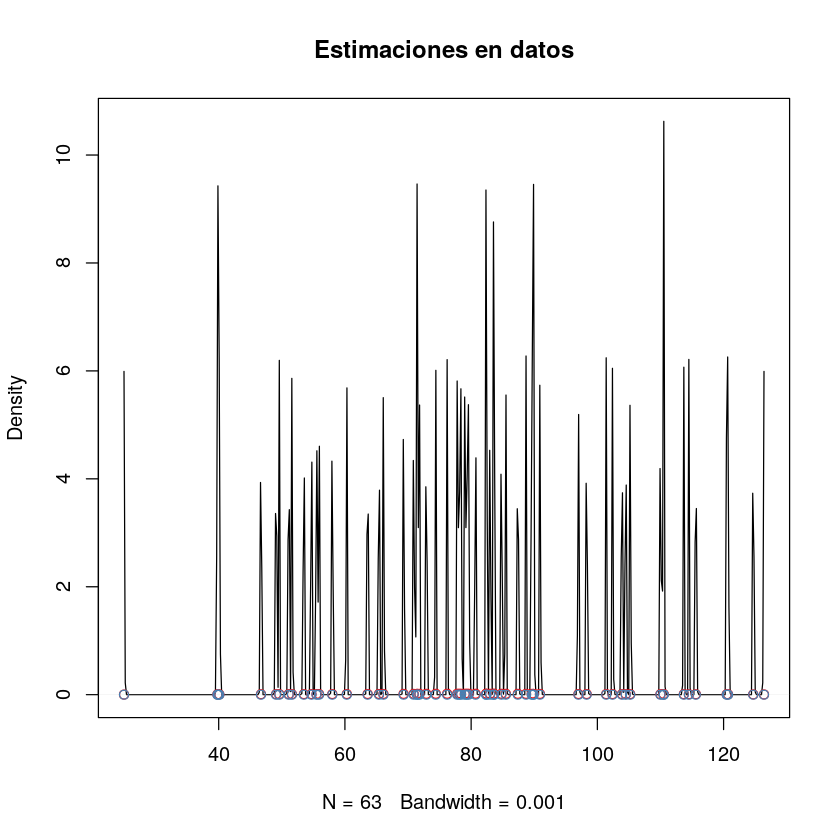

In [163]:
plot(density(datos, bw=0.001), main="Estimaciones en datos")
points(datos, f.hat, col='red')
points(datos, rep(0, n),col='steelblue')

# $$\huge \mathcal 9.$$

9. Llamemos $\normalsize \widehat f_h^{(-i)}$ a la densidad estimada sin utilizar al punto x i y usando la ventana h.
(−i)

Calcule las estimaciones f b h
para i = 17, 20, 51 de la densidad f usando la función
density a partir de los datos de Buffalo usando el núcleo de Epanechnikov y la ventana
h = 5. 

Grafique en un mismo plot la estimación de f basada en todos los datos usando
(−i)
el núcleo de Epanechnikov y la ventana h = 5 y las estimaciones f b h para i = 17, 20, 51.

Compare las estimaciones obtenidas.

In [ ]:
n <- length(datos)
f.hat_17 <- rep(NA, n)
for(i in 1:n){
    x <- datos[i]
    f.hat[i] <- density(datos, from=x, to=x, n=1)$y
}

In [142]:
f.hat <- density(datos, kernel="epanechnikov", bw=5)
f.hat_17 <- density(datos[-17], kernel="epanechnikov", bw=5)
f.hat_20 <- density(datos[-20], kernel="epanechnikov", bw=5)
f.hat_51 <- density(datos[-51], kernel="epanechnikov", bw=5)

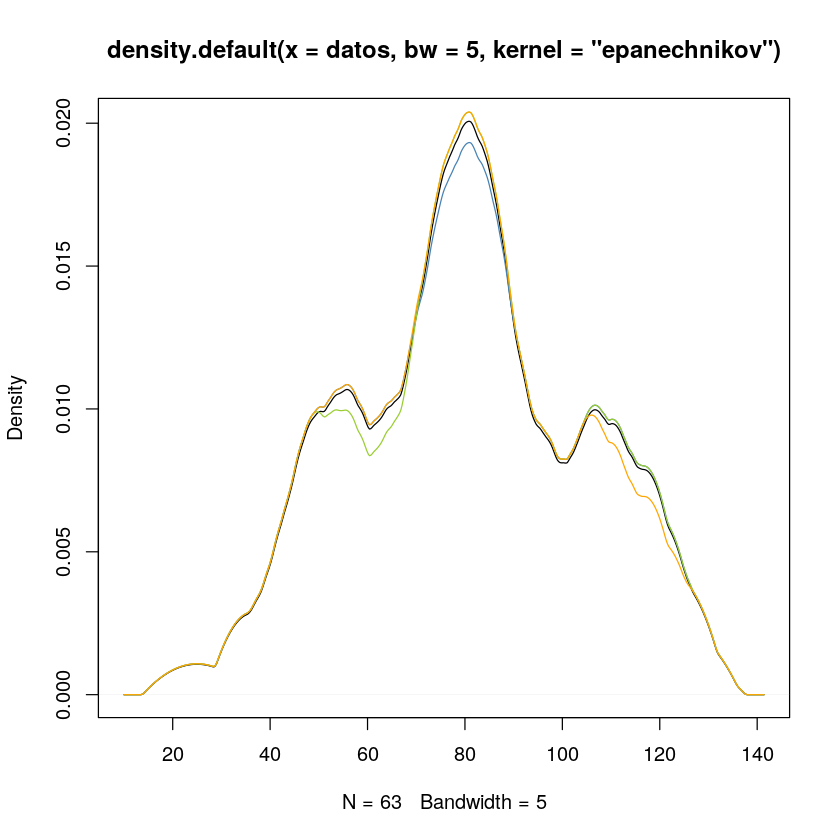

In [143]:
plot(f.hat)
lines(f.hat_17, col="steelblue")
lines(f.hat_20, col="yellowgreen")
lines(f.hat_51, col="orange")

# $$\huge \mathcal {10}.$$

10. Halle la ventana de convalidación cruzada por máxima verosimilitud para la estimación de
la densidad basada en el núcleo de Epanechnikov utilizando los datos de Buffalo mediante
la función de R density. 

  Utilice una grilla para la ventana h que varı́e entre 5 y 25 con
paso 0.25. 

  Realice un gráfico de h versus la pseudo–log–verosimilitud calculada para cada
h.

## Leave-One-Out Cross Validation 

Maximización de una pseudo-log-verosimilitud computada sacando de los datos una observació a la vez

$$\Large h_{MV}^* = \text{argmax}_h \left( \frac 1 n \sum_{i=1}^n \log \widehat f_h^{(-i)}(x_i)\right)$$

siendo $\widehat f_h^{(-i)}(x_i)$ la densidad estimada en el punto $x_i$ **sin** utilizar al punto $x_i$ en su calculo:

$$\Large \widehat f_h^{(-i)}(x_i) = \frac 1 {(n-1) \ h} \sum_{j \neq i} K \left( \frac {x_i-x_j}{h}\right)$$

In [214]:
densidad.estim.LOO <- function(X, i, h){
    X_ <- X[-i]
    xi <- X[i]
    
    t  <- (xi - X_) / h
    
    Kt <- ker.epanechnikov(t)

    n <- length(X)
    c <- 1 / (h * (n-1))
    
    f.i <- c * sum(Kt)
    
    return (f.i)
}

In [215]:
log(1e-9)

[1] -20.72327

In [231]:
densidad.estim.LOO(datos, 10, 5)

[1] 0

In [290]:
log.verosimilitud <- function(X, h){
    n <- length(X)
    s <- 0
    for(i in 1:n){
        f.i <- densidad.estim.LOO(X, i, h)
        # In case of zero, use small value
        f.i <- max(f.i, 1e-9)
        s <- s + log(f.i)
    }
    s <- s / n
    
    return (s)
}

In [291]:
log.verosimilitud <- function(X, h){
    n <- length(X)
    f.i <- rep(NA, n)
    for(i in 1:n){
        f.i[i] <- densidad.estim.LOO(X, i, h)
        # In case of zero, use small value
        f.i[i] <- max(f.i[i], 1e-9)
    }
    s <- mean(log(f.i))
    
    return (s)
}

In [292]:
log.verosimilitud(datos, 5)

[1] -4.910686

In [293]:
hs <- seq(5,25,0.25)

In [294]:
nH <- length(hs)
log.veros <- rep(NA, nH)
for(i in 1:nH){
    h <- hs[i]
    
    log.veros[i] <- log.verosimilitud(datos, i)
}

In [295]:
hs[which.max(log.veros)]

[1] 9.5

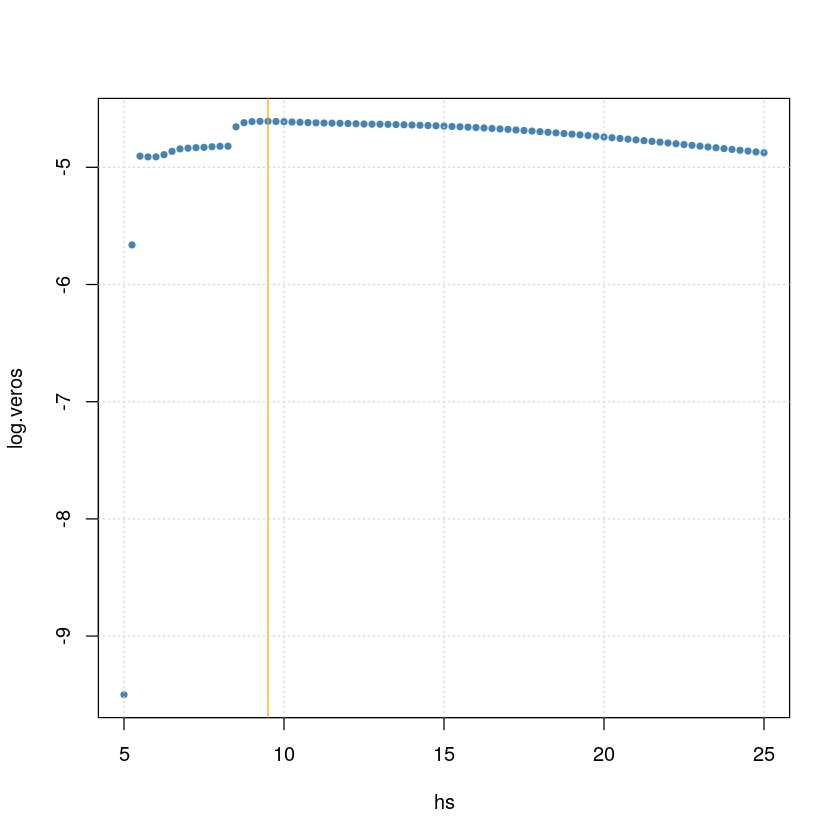

In [296]:
plot(hs, log.veros, pch=20, col="steelblue")
abline(v=hs[which.max(log.veros)], col="orange")
grid()

In [297]:
hs <- seq(5,6,0.01)

In [298]:
nH <- length(hs)
log.veros <- rep(NA, nH)
for(i in 1:nH){
    h <- hs[i]
    
    log.veros[i] <- log.verosimilitud(datos, i)
}

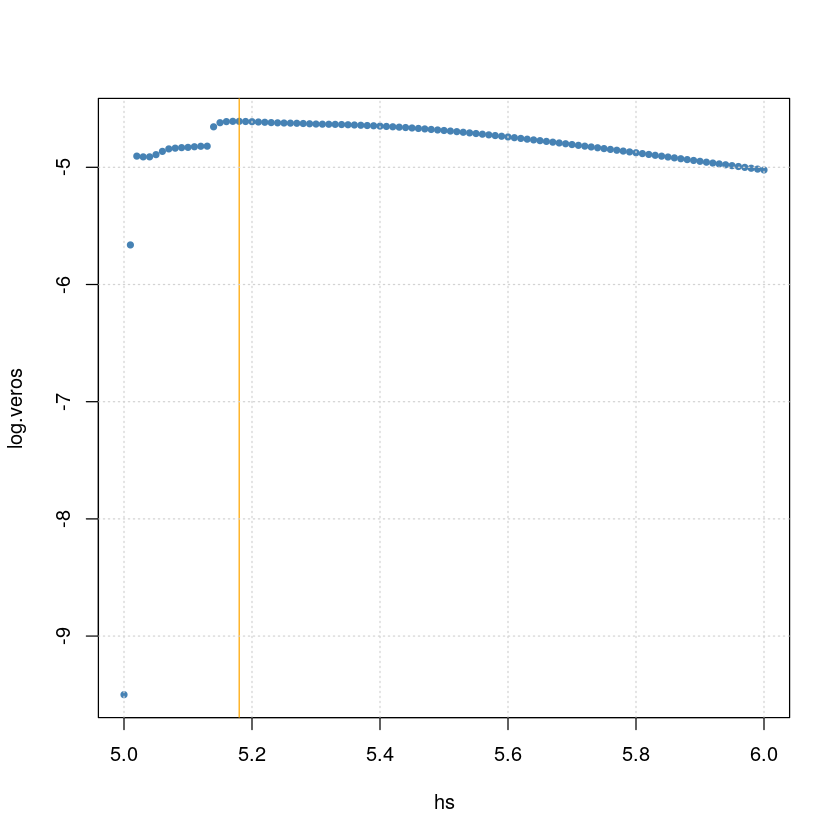

In [299]:
plot(hs, log.veros, pch=20, col="steelblue")
abline(v=hs[which.max(log.veros)], col="orange")

grid()

In [300]:
hs[which.max(log.veros)]

[1] 5.18

In [301]:
hs <- seq(5.17,5.19,0.001)

In [302]:
nH <- length(hs)
log.veros <- rep(NA, nH)
for(i in 1:nH){
    h <- hs[i]
    
    log.veros[i] <- log.verosimilitud(datos, i)
}

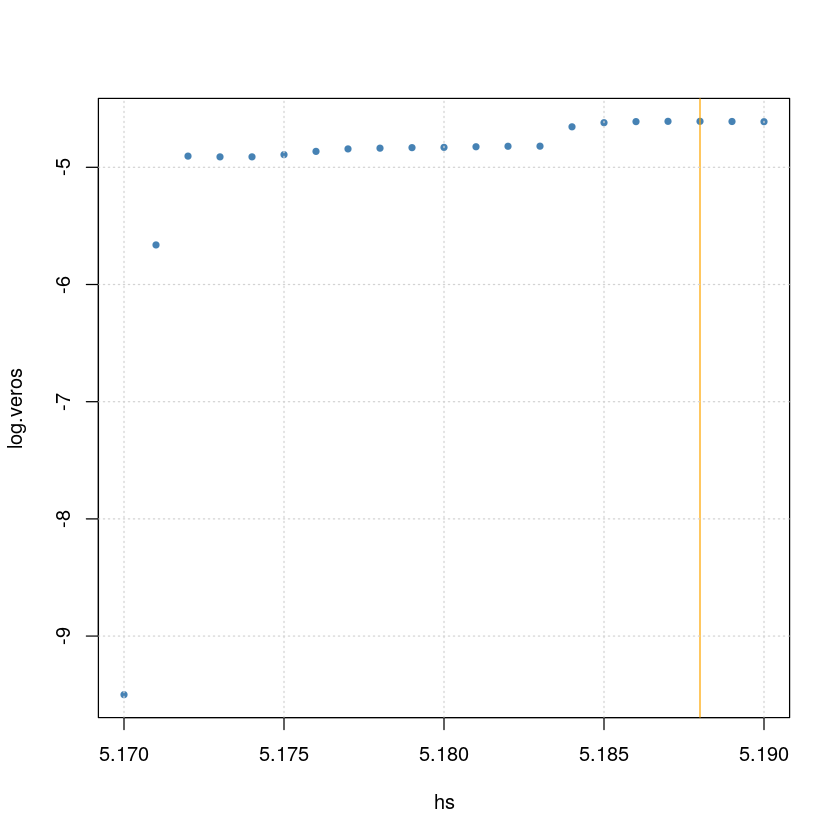

In [303]:
plot(hs, log.veros, pch=20, col="steelblue")
abline(v=hs[which.max(log.veros)], col="orange")

grid()

In [304]:
hs[which.max(log.veros)]

[1] 5.188

In [305]:
hs <- seq(5.187,5.189,0.0001)

In [306]:
nH <- length(hs)
log.veros <- rep(NA, nH)
for(i in 1:nH){
    h <- hs[i]
    
    log.veros[i] <- log.verosimilitud(datos, i)
}

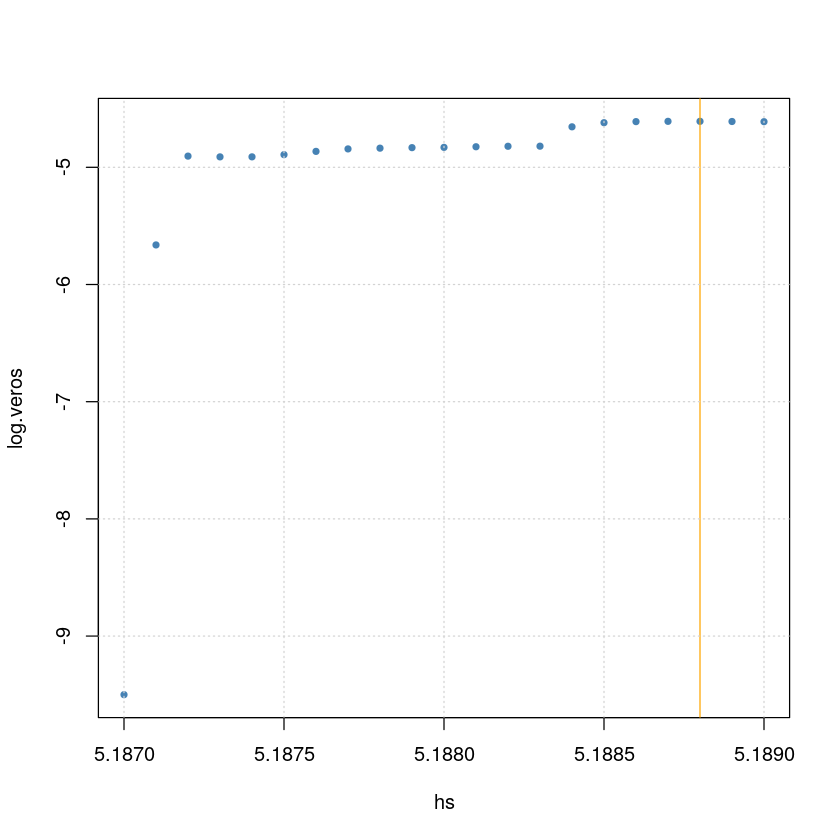

In [307]:
plot(hs, log.veros, pch=20, col="steelblue")
abline(v=hs[which.max(log.veros)], col="orange")

grid()

In [308]:
hs[which.max(log.veros)]

[1] 5.1888

In [309]:
hs <- seq(5.1887,5.1889,0.00001)

In [310]:
nH <- length(hs)
log.veros <- rep(NA, nH)
for(i in 1:nH){
    h <- hs[i]
    
    log.veros[i] <- log.verosimilitud(datos, i)
}

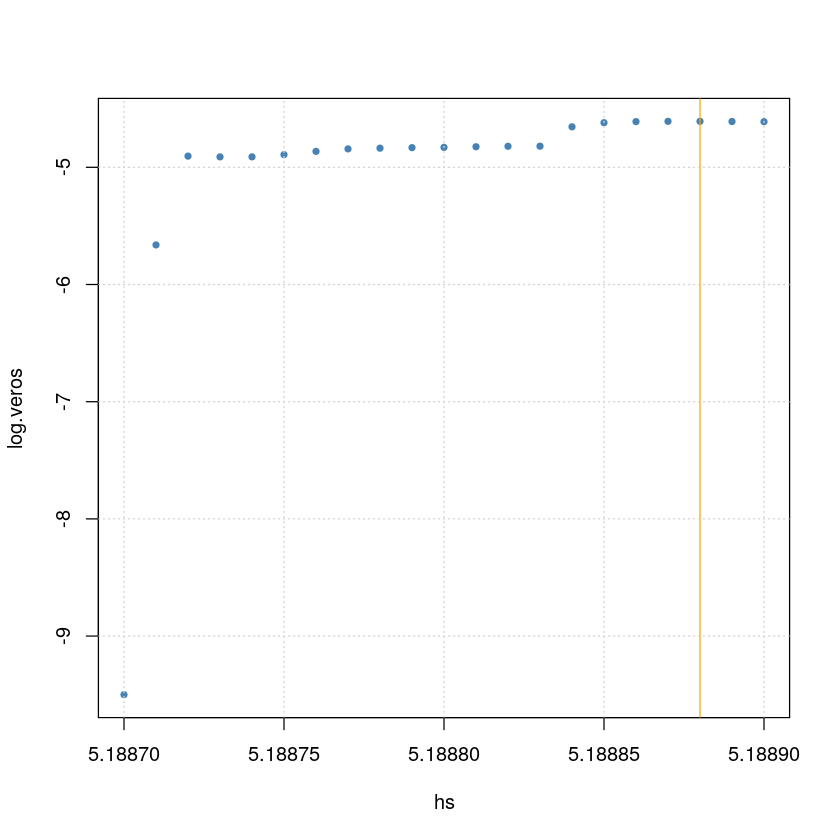

In [311]:
plot(hs, log.veros, pch=20, col="steelblue")
abline(v=hs[which.max(log.veros)], col="orange")

grid()

In [312]:
hs[which.max(log.veros)]

[1] 5.18888

> Y se podría automatizar pero voy a arriesgarme a que la respuesta sea $5.1 \widehat{88}$

# $$\huge \mathcal {11}.$$

11. Grafique en un mismo plot las estimaciones de la densidad obtenidas con el núcleo de Epanechnikov usando la ventana óptima obtenida en el item anterior y usando la ventana
$h_S$ hallada para el núcleo normal. 

Compare los resultados.

In [314]:
f.hat.epa <- density(datos, kernel="epanechnikov", bw=5.188888888)
f.hat.gau <- density(datos, kernel="gaussian", bw=h.Sil(datos))

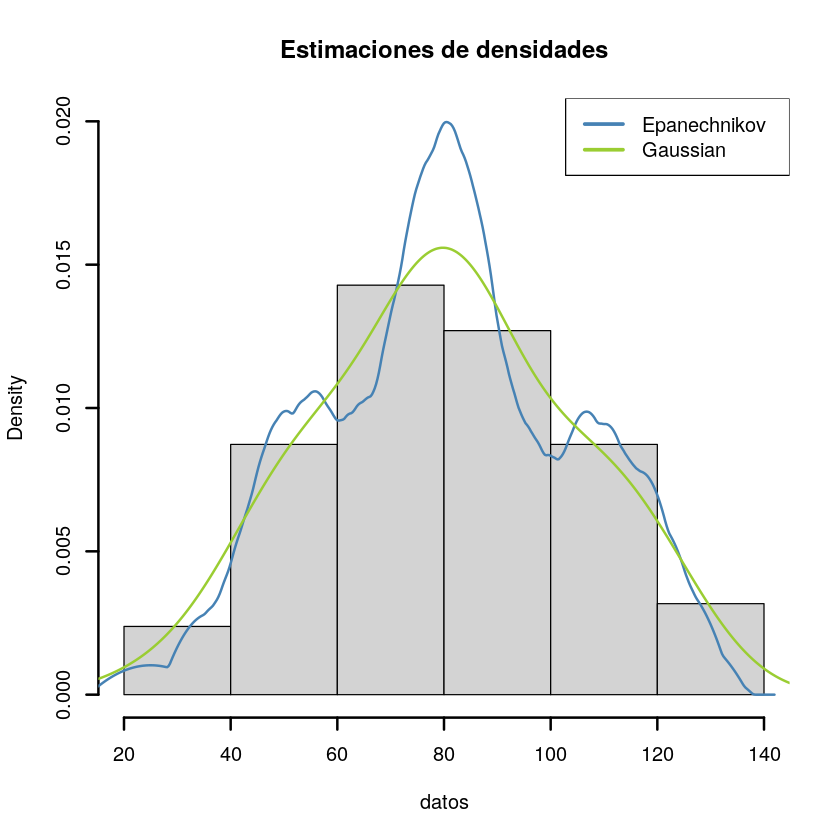

In [339]:
hist(datos, prob=T, ylim=c(0,0.02), lwd=2, col='lightgray', main="Estimaciones de densidades")
lines(f.hat.epa, col="steelblue", lwd=2)
lines(f.hat.gau, col="yellowgreen", lwd=2)
legend('topright', c('Epanechnikov', 'Gaussian'), col=c("steelblue","yellowgreen"), lty=1, lwd=3)
